<a href="https://colab.research.google.com/github/YJK-dev/Momentum/blob/main/color_combination_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 참조 코드 : https://github.com/18yjang/CLOR/blob/main/color%20table/color_table_combined2.ipynb 

# 참조 자료 : https://emmee.tistory.com/3 
#          https://github.com/18yjang/CLOR 

Dominant Color 찾기

In [1]:
pip install opencv-python

In [2]:
from google.colab.patches import cv2_imshow

In [3]:
import cv2, numpy as np
from sklearn.cluster import KMeans

def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0

    dominant = 0

    for (percent, color) in colors:
        #print(color, "{:0.2f}%".format(percent * 100))
        color = color.astype(np.int64)
        if dominant < percent*100 :
          if np.array_equal(color, [0,0,0]) == False :
            dom_color = color
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return dom_color, rect

[239 235 227]


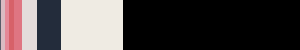

-1

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/PPAM/두줄넵사_ccexpress.png')
#cv2_imshow(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
reshape = image.reshape((image.shape[0] * image.shape[1], 3))

# Find most dominant colors
cluster = KMeans(n_clusters=10).fit(reshape)
dominant, visualize = visualize_colors(cluster, cluster.cluster_centers_)
print(dominant)

# Display most dominant colors - 생략 가능
visualize = cv2.cvtColor(visualize, cv2.COLOR_RGB2BGR)
cv2_imshow(visualize)
cv2.waitKey()

작성한 color_table.csv 파일로 numpy data 생성 csv 배열로 저장

In [5]:
import pandas as pd
import numpy as np
import csv
import json

data=[]

file = open('/content/drive/MyDrive/PPAM/color_table.csv', 'r', encoding='utf-8')    # file : 파일객체

reader = csv.reader(file)  # csv.reader(): for loop을 돌면서 line by line read

for line in reader :
    data.append(line[1: ])  #color_name 부분은 제외하고 나머지 부분만 append

file.close()

print(data)

xy =np.array(data[1:])   # 맨 첫줄 column name 제외하고 data만 xy 매트릭스에 저장

#print(xy)

[['color_num', 'R', 'G', 'B', 'E', 'S', 'L'], ['0', '244', '197', '191', '5', '170', '205'], ['1', '209', '66', '68', '239', '146', '129'], ['2', '241', '89', '42', '9', '210', '133'], ['3', '246', '239', '221', '29', '140', '220'], ['4', '251', '213', '78', '31', '229', '155'], ['5', '1', '121', '73', '104', '236', '57'], ['6', '201', '223', '237', '136', '120', '206'], ['7', '27', '72', '114', '139', '148', '66'], ['8', '115', '70', '90', '222', '58', '87'], ['9', '99', '75', '71', '6', '40', '80'], ['10', '174', '181', '189', '141', '24', '171'], ['11', '255', '255', '255', '160', '0', '240'], ['12', '0', '0', '0', '147', '55', '0'], ['13', '249', '246', '239', '28', '109', '230'], ['14', '235', '223', '201', '26', '110', '205'], ['15', '234', '215', '201', '17', '106', '205'], ['16', '211', '189', '168', '20', '79', '178'], ['17', '170', '142', '120', '18', '55', '136'], ['18', '111', '114', '93', '46', '24', '97'], ['19', '123', '118', '99', '32', '26', '104'], ['20', '167', '172'

어울리는 pair 입력하기

In [6]:
#contrasting pair
c_pair = {0 : [6, 7, 10], 1 : [6, 7, 10], 2 : [5, 6, 7], 3 : [7, 8, 9], 4 : [5, 7, 12], \
          5 : [42, 8, 16], 6 : [0, 1, 2], 7 : [0, 1, 10], 8 : [42, 5, 10], 9 : [3, 11, 12], 
          10 : [0, 7, 8], 11 : [12, 18, 21], 12 : [13, 14, 15], \
          13 : [18, 19, 21], 14 : [20, 19, 21], 15 : [19, 20, 21], 16 : [18, 20, 21], 17 : [11, 13, 12], \
          18 : [13, 15, 17], 19 : [11, 13, 14], 20 : [13, 15, 18], 21 : [13, 15, 16], \
          22 : [28, 29, 21], 23 : [46, 21, 29], 24 : [46, 21, 12], 25 : [11, 22, 29], \
          26 : [23, 36, 28], 27 : [11, 47, 21], 28 : [11, 22, 47], 29 : [22, 23, 24], \
          30 : [36, 37, 46], 31 : [34, 35, 36], 32 : [34, 36, 47], 33 : [36, 47, 12], \
          34 : [35, 36, 37], 35 : [11, 31, 32], 36 : [32, 30, 16], 37 : [34, 32, 31], \
          38 : [35, 36, 12], 39 : [11, 36, 37], 40 : [35, 36, 46], 41 : [11, 36, 46], \
          42 : [11, 36, 46], 43 : [11, 36, 37], 44 : [35, 36, 46], 45 : [11, 36, 46], \
          46 : [14, 15, 30], 47 : [30, 32, 33], 48 : [11, 35, 36], 49 : [11, 35, 36], \
          50 : [11, 54, 73], 51 : [79, 80, 11], 52 : [73, 53, 72], 53 : [63, 75, 52], \
          54 : [55, 43, 63], 55 : [54, 53, 59], 56 : [11, 57, 54], 57 : [30, 73, 11], \
          58 : [59, 11, 54], 59 : [80, 52, 53], 60 : [73, 53, 54], 61 : [59, 73, 42], \
          62 : [43, 70, 14], 63 : [12, 72, 47], 64 : [73, 63, 12], 65 : [26, 11, 14], \
          66 : [68, 55, 14], 67 : [68, 55, 14], 68 : [66, 67, 55], 69 : [72, 47, 12], \
          70 : [71, 26, 76], 71 : [26, 70, 74], 72 : [77, 73, 74], 73 : [77, 74, 47], \
          74 : [72, 47, 72], 75 : [72, 26, 71], 76 : [70, 74, 69], 77 : [76, 72, 71], \
          78 : [72, 79, 59], 79 : [51, 77, 73], 80 : [61, 72, 35]}

#tonal pair
t_pair = {0 : [1, 33, 32], 1 : [0, 3, 27], 2 : [3, 9, 44], 3 : [30, 80, 63], 4 : [3, 74, 30], \
          5 : [4, 6, 50], 6 : [7, 8, 54], 7 : [6, 8, 54], 8 : [48, 49, 60], 9 : [17, 26, 45], \
          10 : [11, 12, 35], 11 : [13, 14, 15], 12 : [20, 21, 47], \
          13 : [11, 14, 63], 14 : [15, 17, 63], 15 : [13, 16, 17], 16 : [13, 14, 17], 17 : [14, 15, 16], \
          18 : [19, 36, 47], 19 : [18, 47, 36], 20 : [11, 21, 12], 21 : [11, 20, 12], \
          22 : [23, 33, 32], 23 : [22, 33, 32], 24 : [25, 26, 79], 25 : [24, 26, 79], \
          26 : [24, 25, 79], 27 : [22, 23, 29], 28 : [27, 29, 68], 29 : [27, 28, 64], \
          30 : [24, 25, 26], 31 : [32, 33, 23], 32 : [31, 33, 23], 33 : [31, 27, 29], \
          34 : [48, 49, 60], 35 : [36, 21, 47], 36 : [47, 37, 35], 37 : [47, 12, 35], \
          38 : [42, 44, 40], 39 : [40, 42, 45], 40 : [39, 43, 45], 41 : [39, 44, 45], \
          42 : [39, 44, 43], 43 : [42, 44, 45], 44 : [39, 40, 45], 45 : [39, 44, 43], \
          46 : [21, 20, 37], 47 : [35, 36, 37], 48 : [34, 49, 60], 49 : [34, 48, 60], \
          50 : [69, 77, 51], 51 : [70, 77, 18], 52 : [13, 78, 32], 53 : [54, 72, 76], \
          54 : [57, 72, 59], 55 : [11, 75, 30], 56 : [64, 68, 27], 57 : [61, 72, 71], \
          58 : [52, 32, 33], 59 : [54, 57, 72], 60 : [48, 49, 34], 61 : [54, 72, 62], \
          62 : [61, 54, 72], 63 : [11, 80, 75], 64 : [29, 68, 45], 65 : [53, 54, 72], \
          66 : [70, 51, 67], 67 : [51, 70, 66], 68 : [64, 28, 29], 69 : [11, 13, 75], \
          70 : [50, 66, 69], 71 : [72, 76, 53], 72 : [71, 76, 53], 73 : [75, 13, 35], \
          74 : [14, 13, 75], 75 : [14, 35, 63], 76 : [71, 72, 53], 77 : [70, 66, 50], \
          78 : [11, 75, 14], 79 : [25, 80, 63], 80 : [79, 63, 14]}

RGB 값을 Lab으로 변환해서 similar color 찾아 similar color과 어울리는 색상 pair의 값 출력

In [7]:
pip install colormath 

  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39408 sha256=37b8807c7ff44a4a145f6976a9abc5be40311ee4d2e45b5131035d14796edb08
  Stored in directory: /root/.cache/pip/wheels/1a/d7/a7/458a4632ccc8bfe436f5e9db9fef1aa84e5d243a1b4b4c7b59
Successfully built colormath


In [11]:
from colormath.color_objects import LabColor, sRGBColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000

#입력받은 input - 연결 필요
input = sRGBColor(dominant[0], dominant[1], dominant[2], is_upscaled=True) 
input_lab = convert_color(input, LabColor, through_rgb_type=sRGBColor)

similar = 100000000
index = 0

#색상 테이블 수에 따라서 range안의 값 바꾸기 - 출력해서 수 확인+1
for i in range(81) : 
  color_n = xy[i][0]

  #sRGB 클래스 인스턴스 생성. RGB 값을 넣을 때 is_upscaled=True로 해줘야 함
  rgb = sRGBColor(float(xy[i][1]),float(xy[i][2]), float(xy[i][3]), is_upscaled=True)

  #Lab으로 변환
  lab = convert_color(rgb, LabColor, through_rgb_type=sRGBColor)
  #print(lab)

  delta_e = delta_e_cie2000(input_lab, lab)
  #print(i, '번: ',delta_e)

  if(similar > delta_e) :
    similar = delta_e
    index = i


best_pair_c = c_pair[index]
best_pair_t = t_pair[index]

if (similar > 15) :
  print('유사 주의')

def rgb2hex(r, g, b): 
	hex_color = "#" + base10Tobase16(r) + base10Tobase16(g) + base10Tobase16(b) 
	return hex_color

def base10Tobase16(i): 
	base16 = "%02X" % int(i) 
	return base16 


complement_color_list = []
tonal_color_list = []

#print('유사 기준 : ', similar)
print('가장 유사한 색상 인덱스 : ', index) 
print('색상 : ', rgb2hex(dominant[0], dominant[1], dominant[2]))

print('#보색 조합 : ',best_pair_c) #complementary 배색 
for i in best_pair_c :
  r = int(xy[i][1])
  g = int(xy[i][2])
  b = int(xy[i][3])
  print(i, '번 색상', '( ',rgb2hex(r, g, b), ')')
  complement_color_list.append(rgb2hex(r, g, b))

print('#유사 색상 조합 : ', best_pair_t) #tonal 배색
for i in best_pair_t :
  r = int(xy[i][1])
  g = int(xy[i][2])
  b = int(xy[i][3])
  print(i, '번 색상', '( ',rgb2hex(r, g, b), ')')
  tonal_color_list.append(rgb2hex(r, g, b))

#print(complement_color_list)
#print(tonal_color_list)

가장 유사한 색상 인덱스 :  13
색상 :  #EFEBE3
#보색 조합 :  [18, 19, 21]
18 번 색상 (  #6F725D )
19 번 색상 (  #7B7663 )
21 번 색상 (  #434B4D )
#유사 색상 조합 :  [11, 14, 63]
11 번 색상 (  #FFFFFF )
14 번 색상 (  #EBDFC9 )
63 번 색상 (  #D8CDB0 )
